In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as spe
import matplotlib.image as mpimg

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in arctan


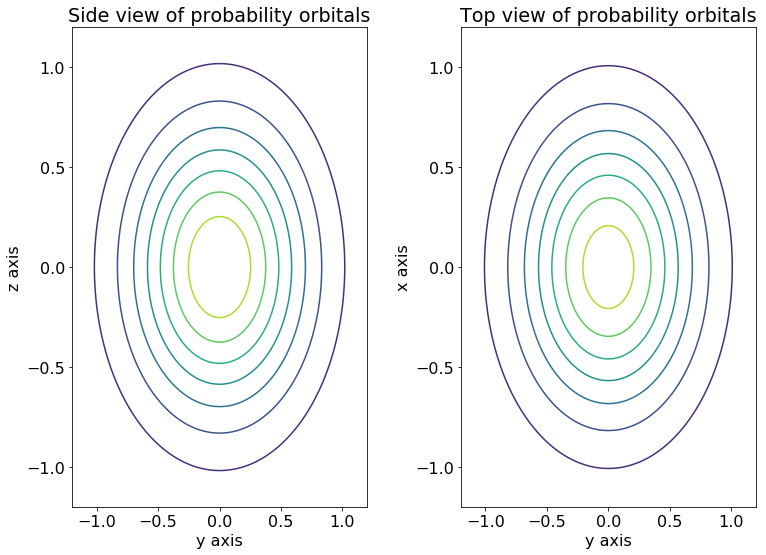

In [71]:
## 3-D Time Independent PDF for a hydrogen atom from equations in Griffiths

## n must be a whole number
n = 1
## l must be an integer 0 <= l <= n-1
l = 0
## m must be an integer -l <= m <= l
m = 0
## a very rough attempt to make the plots fit the orbitals being shown
scale = n*1.2

## Using method found on towardsdatascience.com: Quantum Physics Visualization With Python
x=np.linspace(0,1,30)
y=np.linspace(0,1,30)
z=np.linspace(0,1,30)

## General wavefunction for H atom, equation from Griffiths, referenced pitt.edu: djburrill @ Pitt
def probability(n, l, m, x, y, z):
    ## a is a constant
    a = .529*10**(-10)
    
    ## Converting x, y, and z inputs to spherical coords
    r = x*x +y*y+z*z
    phi = np.arctan(y/x)
    theta = np.arctan(np.sqrt(x*x+y*y)/z)
   
    ## defining the wavefunction
    coeff = np.sqrt((2/(n))**3*(math.factorial(n-l-1))/(2*n*(math.factorial(n+l))**3))
    component = np.exp((-r)/(n))*((2*r)/(n))**l
    laguerre = spe.assoc_laguerre((2*r)/(n), n-l-1, 2*l+1)
    harmonic = spe.sph_harm(m,l,phi,theta)
    psi = coeff*component*laguerre*harmonic
    
    ## defining probability
    probability = psi*psi
    return probability

## Making a figure with subplots
plt.rcParams['figure.figsize'] = [11, 8]
plt.rcParams['font.size'] = 16

fig1, (ax1, ax2) = plt.subplots(1,2)

## Making first plot
## generating matrix of probabilities for y-z plane 2-D view.
y = np.linspace(-scale,scale,102)
z = np.linspace(-scale,scale,102)

Y, Z = np.meshgrid(y, z)
Prob = probability(n, l, m, 0, Y, Z)

ax1.contour(Y, Z, Prob)
ax1.title.set_text("Side view of probability orbitals")
ax1.set_xlabel('y axis')
ax1.set_ylabel('z axis')

## Making second plot
## Generating matrix of probabilities for x-y plane
a = np.linspace(-scale,scale,102)
b = np.linspace(-scale,scale,102)

A, B = np.meshgrid(a, b)
Prob = probability(n, l, m, A, B, np.pi/2)

ax2.contour(A, B, Prob)
ax2.title.set_text("Top view of probability orbitals")
ax2.set_xlabel('y axis')
ax2.set_ylabel('x axis')

plt.tight_layout()
plt.show()